In [1]:
# Instalar a biblioteca PySUS
!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade

# ⚠️ Após executar a célula acima, reinicie a sessão do Google Colab:
# Em português: Vá em "Tempo de execução" > "Reiniciar sessão"

  Cloning https://github.com/AlertaDengue/PySUS.git to /tmp/pip-req-build-anl671_t
  Running command git clone --filter=blob:none --quiet https://github.com/AlertaDengue/PySUS.git /tmp/pip-req-build-anl671_t
  Resolved https://github.com/AlertaDengue/PySUS.git to commit 54f7800db4da5171d55e3446d638d64beeb8b149
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.6/462.6 k

In [43]:
from pysus.online_data.CNES import download
import pandas as pd

# Baixar base CNES - Leitos do Paraná (jan/2023)
df = download('LT', 'PR', 2023, 1).to_dataframe()

# Agrupar leitos SUS por município
df['QT_SUS'] = pd.to_numeric(df['QT_SUS'], errors='coerce').fillna(0)
leitos_por_mun = df.groupby('CODUFMUN')['QT_SUS'].sum().reset_index()
leitos_por_mun.columns = ['CODUFMUN', 'TOTAL_LEITOS_SUS']
leitos_por_mun['CODUFMUN'] = leitos_por_mun['CODUFMUN'].astype(str).str.zfill(6)


38555it [00:00, 32728474.14it/s]     


In [44]:
# Lê o arquivo que você enviou
caminho_arquivo = "https://github.com/cartaproale/PySUS/raw/main/tabelas/municipios.csv"
mun_df = pd.read_csv(caminho_arquivo, encoding='utf-8', sep=';')

# Identifica colunas com códigos e nomes
print(mun_df.columns)
mun_df.head()


Index(['CÓDIGO DO MUNICÍPIO - TOM', 'CÓDIGO DO MUNICÍPIO - IBGE',
       'MUNICÍPIO - TOM', 'MUNICÍPIO - IBGE', 'UF'],
      dtype='object')


,CÓDIGO DO MUNICÍPIO - TOM,CÓDIGO DO MUNICÍPIO - IBGE,MUNICÍPIO - TOM,MUNICÍPIO - IBGE,UF
0,1,1100106,GUAJARÁ-MIRIM,Guajará-Mirim,RO
1,2,1100379,ALTO ALEGRE DOS PARECIS,Alto Alegre dos Parecis,RO
2,3,1100205,PORTO VELHO,Porto Velho,RO
3,4,1100452,BURITIS,Buritis,RO
4,5,1100122,JI-PARANÁ,Ji-Paraná,RO


In [45]:
arquivo = 'https://github.com/cartaproale/PySUS/raw/main/tabelas/municipios.csv'
mun_df = pd.read_csv(arquivo, sep=';', encoding='utf-8', dtype=str)

# Filtra apenas municípios do PR
mun_df = mun_df[mun_df['UF'] == 'PR'].copy()

# Renomeia
mun_df = mun_df.rename(columns={
    'CÓDIGO DO MUNICÍPIO - IBGE': 'CODUFMUN',
    'MUNICÍPIO - IBGE': 'municipio_nome'
})

# Converte para string de 6 dígitos removendo o dígito verificador
mun_df['CODUFMUN'] = mun_df['CODUFMUN'].str.strip().str.slice(0,6)


In [46]:
leitos_por_mun['CODUFMUN'] = leitos_por_mun['CODUFMUN'].astype(str).str.zfill(6)
df_final = leitos_por_mun.merge(mun_df[['CODUFMUN', 'municipio_nome']], on='CODUFMUN', how='left')


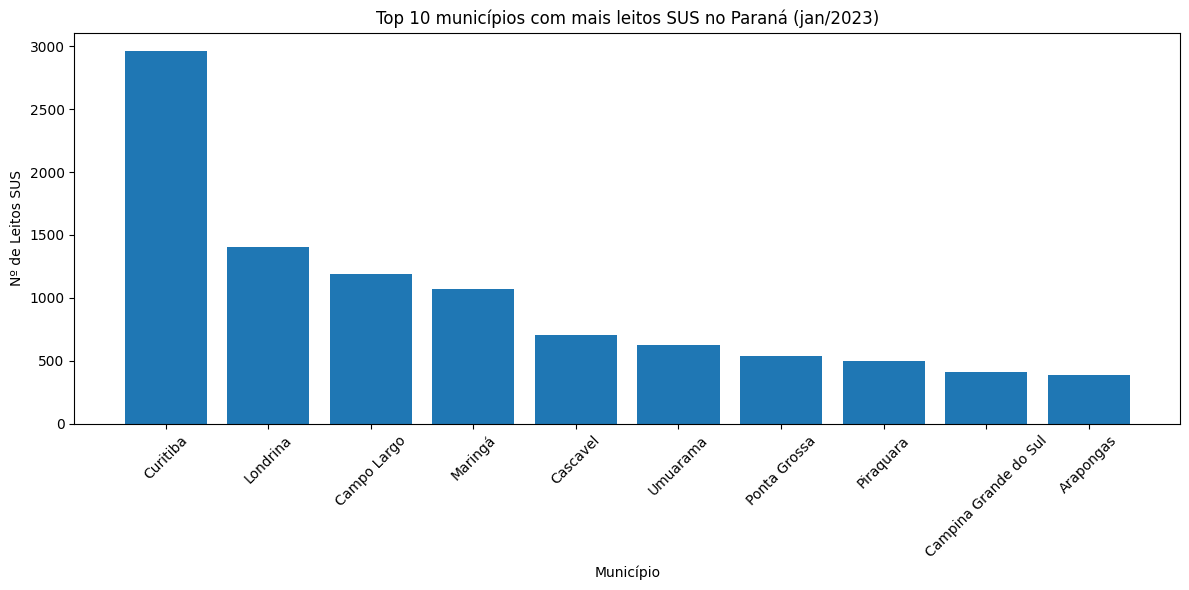

In [47]:
top10 = df_final.sort_values(by='TOTAL_LEITOS_SUS', ascending=False).head(10)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(top10['municipio_nome'], top10['TOTAL_LEITOS_SUS'])
plt.title('Top 10 municípios com mais leitos SUS no Paraná (jan/2023)')
plt.ylabel('Nº de Leitos SUS')
plt.xlabel('Município')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
